# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [13]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)
from scipy import stats

In [15]:
def plot_ecdf(data,label,log_scale=0):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    
    #Make plot
    ecdf = plt.plot(x, y,label=label,marker='.',linestyle='none')

    if log_scale == 1:
        plt.xscale('log')
        plt.xlabel(label)
        plt.ylabel('ECDF')
        plt.ylim(ymax=1)
    else:
        plt.xlabel(label)
        plt.ylabel('ECDF')
        plt.ylim(ymax=1)
    return ecdf

## 1. Is the distribution of body temperatures normal? 

In [16]:
norm_temp = np.random.normal(df['temperature'].mean(),df['temperature'].std(),len(df['temperature']))
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

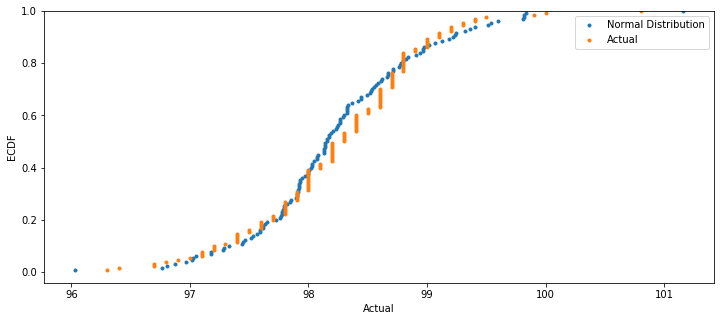

In [17]:
plot_ecdf(norm_temp,'Normal Distribution')
plot_ecdf(df['temperature'],'Actual')
plt.legend()
plt.show()

Body temperature is normally distributed
## 2. Is the sample size large? Are the observations independent?

In [18]:
df.shape

(130, 3)

Sample size is large (n>30), and features appear independent, as each observation is from a different person and not impacted by other observations. 
## 3 . Is the true population mean really 98.6 degrees F?

It is appropriate to use a one sample t-test because I am comparing one sample to the population mean, and the population standard deviation is unknown.

$$t = \frac{\bar{x} - \mu_{\bar{x}}}{\frac{s}{\sqrt{n}}}$$

__H<sub>0</sub>__ : No statistically significant difference between population mean and sample mean (p >= .05)<br>
__H<sub>a</sub>__ : Statisticially signficant difference between population mean and sample mean (p < .05)


In [19]:
x_bar = df.temperature.mean()
mu = 98.6
s = df.temperature.std()
n = len(df.temperature)

stats.ttest_1samp(a=df.temperature,popmean =mu)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The null hypothesis is rejected as there is a statistically significant difference (p < .05) between the sample mean and population mean (98.6).

A Z-score can also be used since n > 30, and the sample standard deviation can be used as an estimate of that of the population.

$$ z = \frac{\bar{x} - \mu_{\bar{x}}}{\sigma}$$<br>
$$ \sigma \approx {\frac{s}{\sqrt{n}}}$$
Substituting in sigma for sample standard deviation...<br>
$$ z = \frac{\bar{x} - \mu_{\bar{x}}}{\frac{s}{\sqrt{n}}}$$
The final equation is equivelant to that of the t statistic.

In [8]:
z_score = (x_bar - mu)/(s/n**(1/2))
p_value = stats.norm.sf(abs(z_score))*2

print('Z Score: {}'.format(z_score))
print('p value: {}'.format(p_value))


Z Score: -5.4548232923645195
p value: 4.9021570141012155e-08


Because p < .05 I reject the null hypothesis at the 95% confidence interval, meaning there is a statistically significant difference between the sample mean and Wunderlich's reported population mean.<br>

The t and z statistics both indicate a rejection of the null hypothesis. Because the n > 30 and the sample standard deviation is used to estimate population standard deviation, I end up using the same numbers for both $z$ and $t$ calculations.

## 4. Draw a small sample of size 10 from the data and repeat both tests.

In [9]:
# Get a random sample of 10 observations
random_sample = np.random.choice(df.temperature,size=10)
#Calculate sample mean, standard deviation, and n
rsx_bar = random_sample.mean()
rs_sigma = random_sample.std()
rs_n = len(random_sample)

#t test
t_stat, t_pvalue = stats.ttest_1samp(a=random_sample,popmean=mu)

#z test
z_stat = (rsx_bar - mu)/(rs_sigma/rs_n**(1/2))
z_pvalue = stats.norm.sf(abs(z_stat))*2

print('t-test: t-stat = {}, p value = {}'.format(t_stat,t_pvalue))
print('z-test: z-stat = {}, p value = {}'.format(z_stat,z_pvalue))

t-test: t-stat = -2.3413483152263037, p value = 0.04392317064955955
z-test: z-stat = -2.467997823971004, p value = 0.013587114559084857


 By taking a sample of size 10, n < 30 which means it wouldn't be appropriate to calculate a $z$ score.
 Although both the $z$ statistic and $t$ statistic suggest a failure to reject the null hypothesis, the p value using the $z$-test is noticeably smaller than that of the $t$ statistic. Using the wrong test under specific conditions can yield incorrect results. Its possible that under another random sample draw, the p value for the $z$ statistic would be low enough to incorrectly reject the null hypothesis
 
 ## 5. At what temperature should we consider someone's temperature to be "abnormal"?
 
__Standard Error of Mean:__
$$\sigma_{\bar{x}} \approx \frac{s}{\sqrt{n}}$$

__Confidence Interval:__
$${\bar{x}}\pm z * \sigma_{\bar{x}}$$
where z is the z score at a particular confidence interval.

In [10]:
stats.t.interval(alpha = .95,
                 df = n-1,
                 loc = x_bar,
                 scale=stats.sem(df.temperature))

(98.122002905608014, 98.376458632853485)

I calculate a confidence interval of 95% from the sample data. At this interval, any temperature lower than 98.12 or greater than 98.38 should be considered abnormal.

## 6.  Is there a significant difference between males and females in normal temperature?

To see if there is statistically significant difference in body temperature between males and females, I will begin by plotting boxplots and KDEs to visually inspect any differences

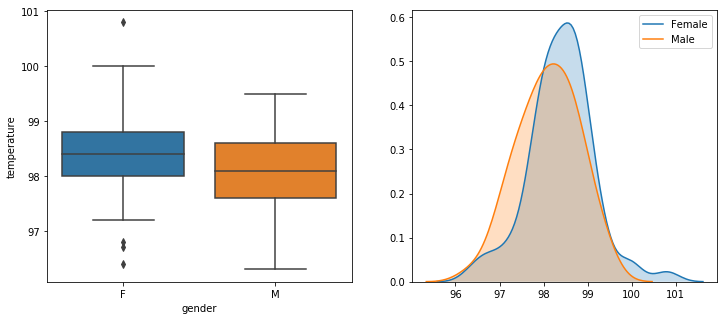

In [11]:
import seaborn as sns
male_temp = df.temperature.loc[df.gender == 'F']
female_temp = df.temperature.loc[df.gender == 'M']
#Temp boxplot by gender
plt.subplot(121)
sns.set_style()
sns.boxplot(x='gender',
            y='temperature',
            data=df)

#Temp KDE plot by gender
plt.subplot(122)
sns.kdeplot(male_temp,label='Female',shade=True)
sns.kdeplot(female_temp,label='Male',shade=True)
plt.show()

The distributions for males and females are noticeably different. I will test for statistical significance in the difference of the means for males and females using a two sample $t$ test.<br><br>
$\mu_m$ : population temperature mean for males<br>
$\mu_f$ : population temperature mean for females<br><br>
$\bar{x}_m$ : sample temperature mean for males<br>
$\bar{x}_f$ : sample temperature mean for females<br><br>
H<sub>0</sub> : $\mu_m = \mu_f $ The two means are equal  <br>
H<sub>a</sub> : $\mu_m \neq \mu_f $ The two means are not equal<br><br>

$$ t = \frac{\bar{x}_m - \bar{x}_f}{\sqrt{\frac{s^2_m}{n_m}+{\frac{s^2_f}{n_f}}}}$$

In [12]:
statistic, pvalue = stats.ttest_ind(a= male_temp,
                b = female_temp,
                equal_var = False)
print('t statistic: {}, p value: {}'.format(statistic,pvalue))

t statistic: 2.285434538165611, p value: 0.023938264182934196


As p < .05, I reject the null hypothesis at the 95% confidence interval, indicating that there is a statistically signficant difference in body temperature between males and females. This corrobates what I inferred from the KDE and boxplots.